In [7]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [8]:
base = pd.read_csv('../Data/BaseData.csv')

In [9]:
base.shape

(2580, 299)

In [10]:
base.isnull().sum().sum()

0

(2064, 298)
(2064,)
(516, 298)
(516,)
37.823166377731454
Ridge(alpha=37.823166377731454)
R2 Train is: 0.9390459912894862
R2 Test is: 0.9238247549004746
ADJ_R2 is: 0.9138728815819044


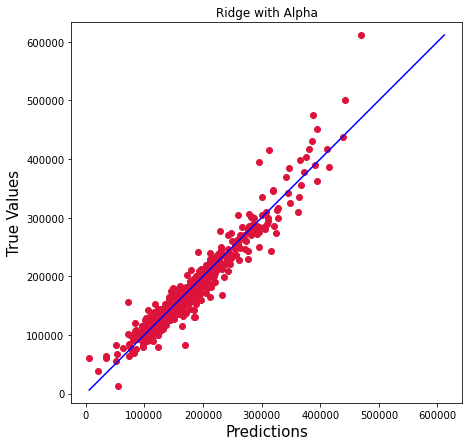


(2064, 298)
(2064,)
(516, 298)
(516,)
12.38538177995857
Ridge(alpha=12.38538177995857)
R2 Train is: 0.939302479868931
R2 Test is: 0.9253741608280787
ADJ_R2 is: 0.915624708801234


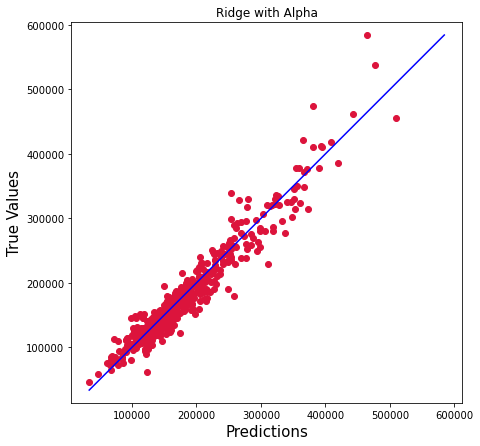


(2064, 298)
(2064,)
(516, 298)
(516,)
115.5064850041579
Ridge(alpha=115.5064850041579)
R2 Train is: 0.9358039703713127
R2 Test is: 0.9156612366027552
ADJ_R2 is: 0.9046428448919359


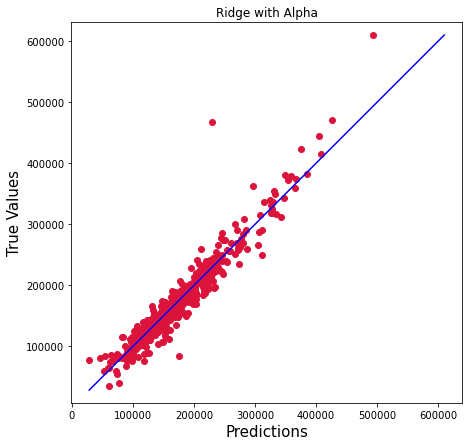


(2064, 298)
(2064,)
(516, 298)
(516,)
152.69277544167062
Ridge(alpha=152.69277544167062)
R2 Train is: 0.9385956475884659
R2 Test is: 0.90416405539291
ADJ_R2 is: 0.8916436207182441


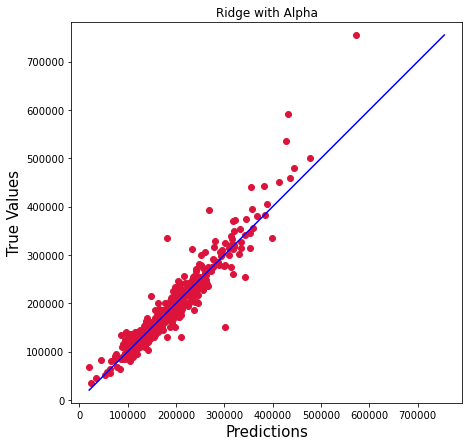


(2064, 298)
(2064,)
(516, 298)
(516,)
50.0
Ridge(alpha=50.0)
R2 Train is: 0.9476249851134713
R2 Test is: 0.8571377207648083
ADJ_R2 is: 0.8384735562702502


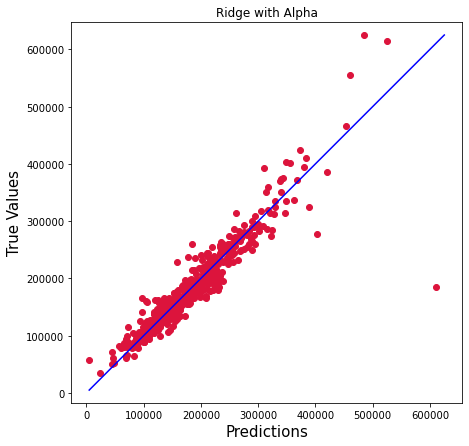

In [14]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

folds = KFold(n_splits = 5, shuffle = True, random_state = None)

for trainIndex, testIndex in folds.split(X):
    X_train, X_test = X[trainIndex], X[testIndex]
    y_train, y_test = y[trainIndex], y[testIndex]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    alphas = 10**np.linspace(10,-2,100)*0.5
    ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, y_train)
    print(ridgecv.alpha_)
    
    ridge = Ridge(alpha=ridgecv.alpha_)
    print(ridge)
    ridge.fit(X_train_scaled, y_train)
    print('R2 Train is: ' + str(ridge.score(X_train_scaled, y_train)))
    print('R2 Test is: ' + str(ridge.score(X_test_scaled, y_test)))
    
    #the below offers same result as above, good back up:
    pred = ridge.predict(X_test_scaled)
    #print(r2_score(y_test, pred))
    
    ADJ_R2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    print('ADJ_R2 is: ' + str(ADJ_R2))
    
    predicted_value = ridge.predict(X_test_scaled)
    true_value = y_test
    
    plt.figure(figsize=(7,7))
    plt.scatter(predicted_value, true_value, c='crimson')

    plt.title('Ridge with Alpha')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.show()
    
    print()
    
#    RSS = pd.DataFrame({'Actual': y_test, 'Predicted':pred})
#    #TSS = pd.DataFrame({'Actual': y_test, 'Average y':np.mean(y_test)})
#    print('RSS is: '+ str(np.sum(np.square(RSS['Predicted'] - RSS['Actual']))))
#    print('TSS is: '+ str(np.sum(np.square(np.mean(y_test) - RSS['Actual']))))
#    print()